# PART3 パラメータをチューニングしてみよう

## おまじない

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [3]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample = pd.read_csv('submit_sample.csv', header=None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [4]:
trainX = train.iloc[:, :-1]
trainX

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown


## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [5]:
y = train['y']

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [6]:
testX = test.copy()

In [7]:
print(trainX.shape)
print(testX.shape)

(27100, 16)
(18050, 16)


## trainXとtestXをダミー変数化しましょう

In [8]:
# trainX = pd.get_dummies(trainX)
# testX = pd.get_dummies(testX)

In [9]:
import category_encoders as ce
ce_ohe = ce.OneHotEncoder(handle_unknown='impute')
ce_ohe.fit(pd.concat([trainX, testX], axis=0))

trainX = ce_ohe.transform(trainX)
testX = ce_ohe.transform(testX)


In [10]:
trainX

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_10,month_11,duration,campaign,pdays,previous,poutcome_1,poutcome_2,poutcome_3,poutcome_4
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,0,0,0,0,0,0,0,0,...,0,0,101,3,498,0,1,0,0,0
1,29,0,1,0,0,0,0,0,0,0,...,0,0,158,2,702,0,0,1,0,0
2,35,0,0,1,0,0,0,0,0,0,...,0,0,351,1,826,0,0,0,1,0
3,31,0,0,0,1,0,0,0,0,0,...,0,0,658,2,120,0,0,0,1,0
4,48,0,0,0,0,1,0,0,0,0,...,0,0,177,1,273,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,0,0,0,0,0,1,0,0,0,...,0,0,345,4,425,0,0,1,0,0
27096,35,1,0,0,0,0,0,0,0,0,...,0,0,121,1,719,0,0,1,0,0
27097,35,1,0,0,0,0,0,0,0,0,...,0,0,177,2,121,0,0,1,0,0


In [11]:
trainX.shape

(27100, 50)

In [12]:
testX.shape

(18050, 50)

## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [13]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [14]:
cross_validate(clf1, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.30023193, 0.30423355, 0.30023193, 0.30023193, 0.30023193]),
 'score_time': array([0.02091169, 0.01691008, 0.02091169, 0.02091169, 0.02091169]),
 'test_score': array([0.69029389, 0.67619773, 0.69763379, 0.69029574, 0.68916622]),
 'train_score': array([0.68456481, 0.69445926, 0.68915697, 0.68453695, 0.68482895])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [15]:
clf2 = DT(max_depth=10, min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [16]:
cross_validate(clf2, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.1040287 , 0.10390162, 0.09602761, 0.13999939, 0.15200067]),
 'score_time': array([0.00399947, 0.00400043, 0.00400019, 0.00800085, 0.00400066]),
 'test_score': array([0.7755038 , 0.76613773, 0.76724102, 0.77677481, 0.78473278]),
 'train_score': array([0.79333291, 0.78978784, 0.78475115, 0.79022598, 0.78797022])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [17]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [18]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [19]:
parameters = {"max_depth": list(range(2,11))}

In [20]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [21]:
gcv = GridSearchCV(clf3, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
           

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [22]:
gcv.cv_results_

{'mean_fit_time': array([0.06000018, 0.09039898, 0.13199887, 0.12639966, 0.13679943,
        0.15520053, 0.19279971, 0.20559993, 0.1945292 ]),
 'std_fit_time': array([0.00357772, 0.0170833 , 0.00715602, 0.01817221, 0.00890951,
        0.00587736, 0.01348216, 0.01376455, 0.01330363]),
 'mean_score_time': array([0.00879993, 0.00800085, 0.00720043, 0.00800037, 0.00640006,
        0.0064002 , 0.00560031, 0.0064003 , 0.00480018]),
 'std_score_time': array([0.00587746, 0.00252986, 0.00299375, 0.00506007, 0.00320092,
        0.00319915, 0.00196003, 0.00195929, 0.00158193]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [23]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

In [24]:
train_score

array([0.6985002 , 0.72383032, 0.74763903, 0.76941738, 0.78760836,
       0.80415328, 0.81864658, 0.83470559, 0.85083044])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x23f9beb4048>,
 <a list of 9 Text xticklabel objects>)

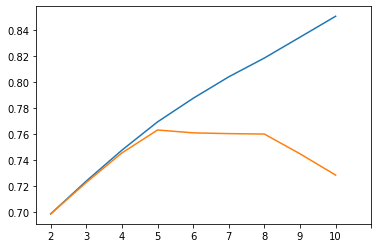

In [25]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [26]:
gcv.best_params_

{'max_depth': 5}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [27]:
pred = gcv.predict_proba(testX)

In [28]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [29]:
sample[1] = pred
sample.to_csv('submit3_bank.csv', index=None, header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [30]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [31]:
parameters2 = {"max_depth": list(range(2,11)), "min_samples_leaf": [5,10,20,50,100,500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [32]:
gcv2 = GridSearchCV(clf4, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            

4.最適なパラメータはなんだったか確かめてみよう

In [33]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 100}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [34]:
pred2 = gcv2.predict_proba(testX)

In [35]:
pred2 = pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [36]:
sample[1] = pred2
sample.to_csv('submit4_bank.csv', index=None, header=None)

## LightGBM

In [37]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

gcv3 = GridSearchCV(lgb, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv3.fit(trainX, y)


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'mi

In [38]:
gcv3.best_params_
pred3 = gcv3.predict_proba(testX)
pred3 = pred3[:,1]

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, gcv3.predict_proba(trainX)[:,1])
# 0.9113408811229391


0.9113408811229391